# Akshith Rao Singam 10/10/2023

# <center><font color=black>Hands-on Assignment</font> </center>  
## <font color=black>Complete the following two sections on Supervised Machine Learning: </font> 
 - Linear Regression
 
 - Logistic Regression

# <center><font color=green>Linear and Logistic Regression</font> </center> 
# <center><font color=green>Part 1: Linear Regression</font> </center> 

## Machine Learning Supervised Linear Regression

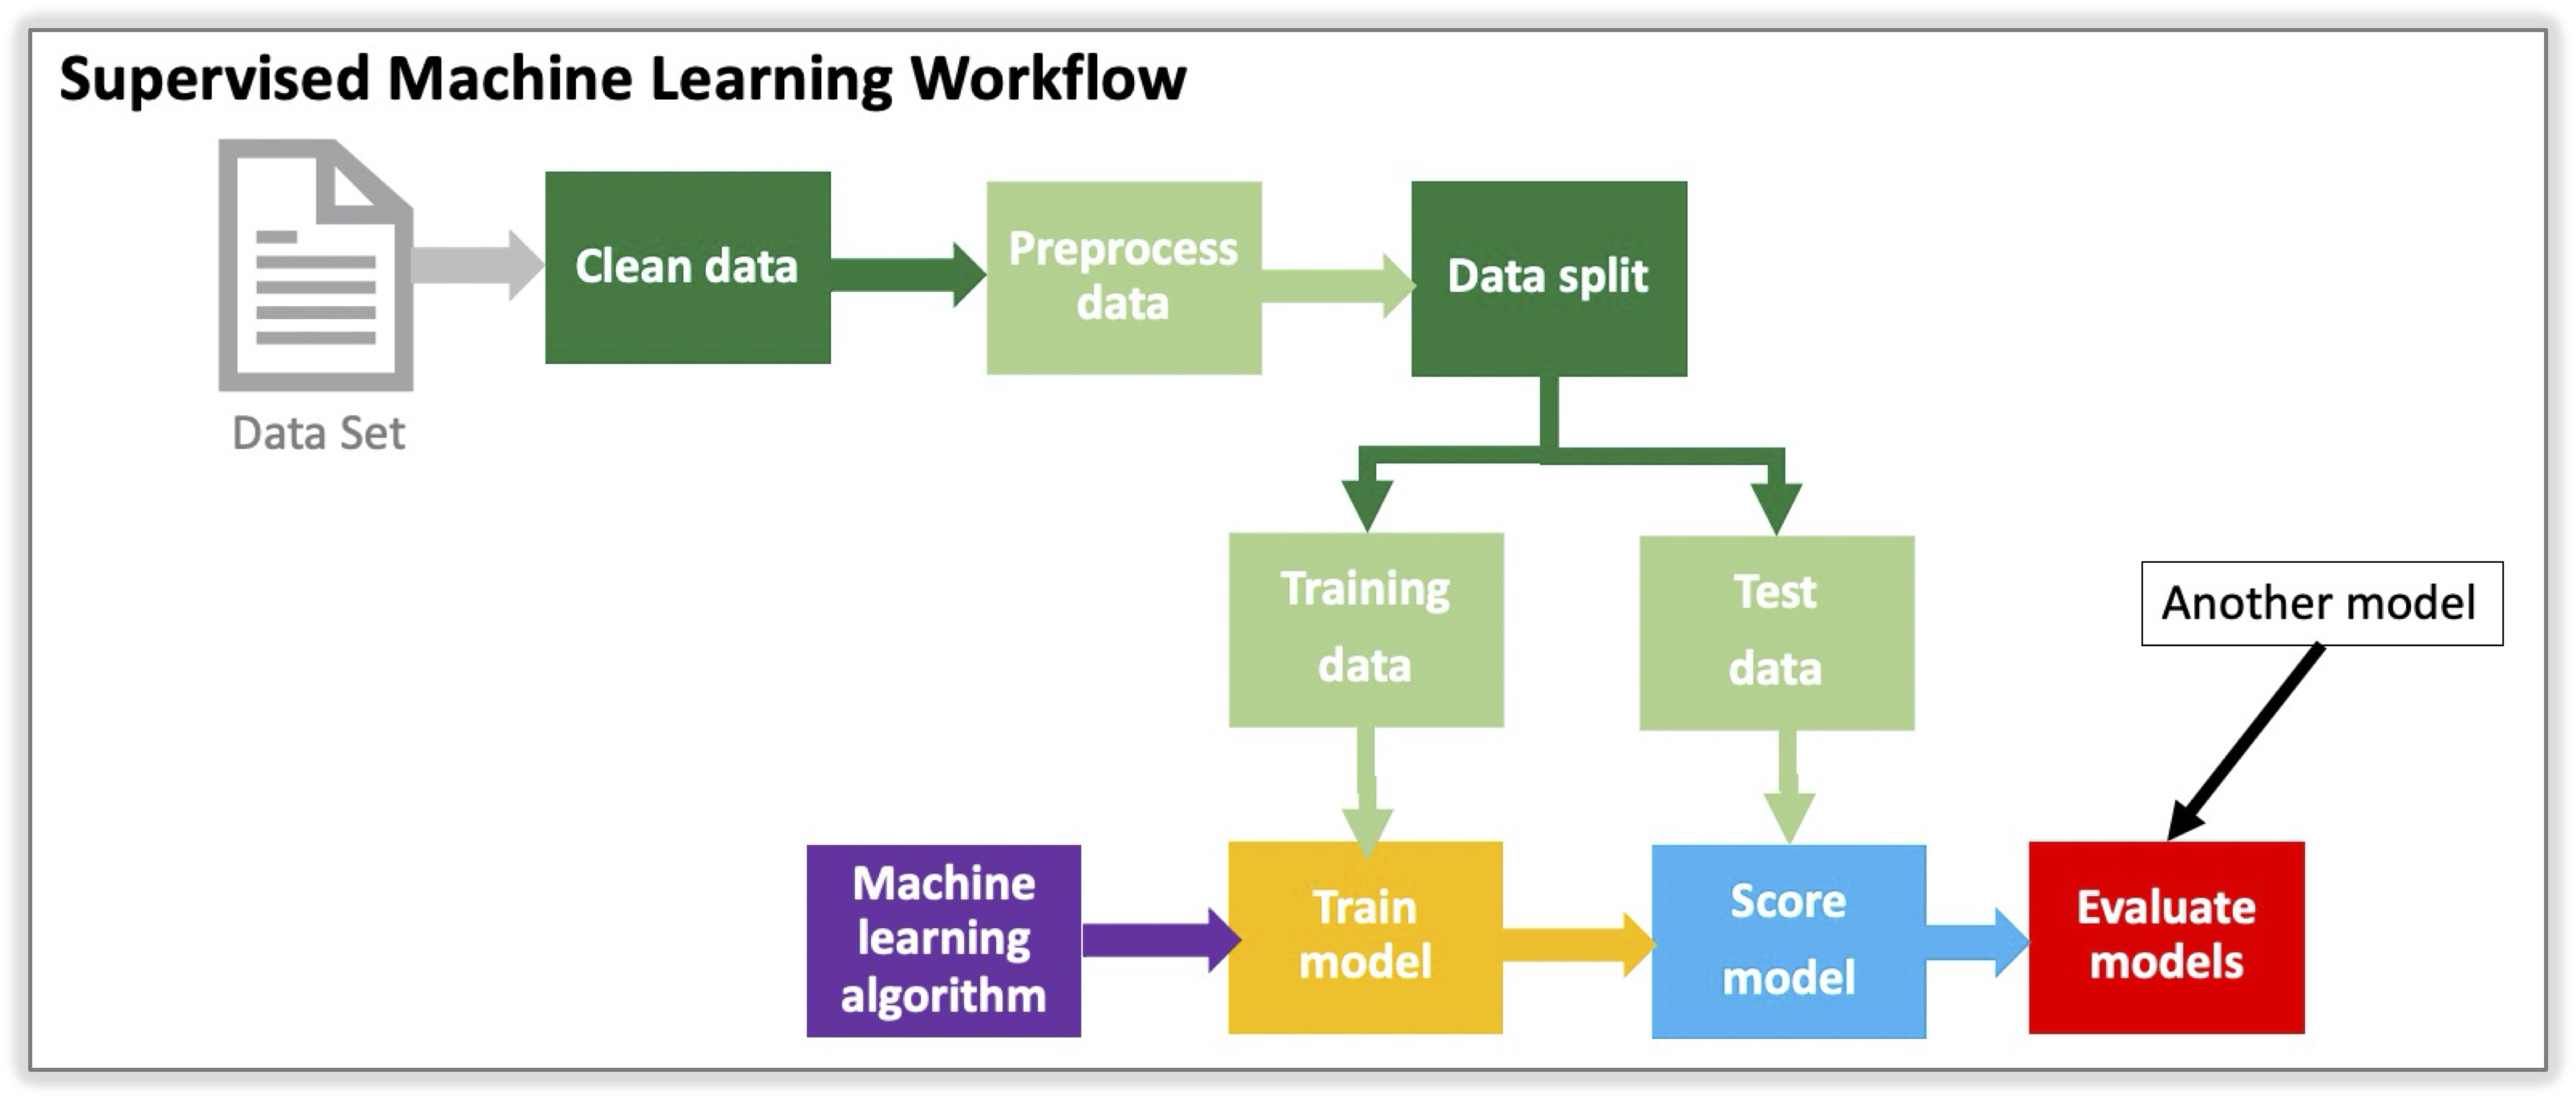

* You can see in the workflow; supervised learning starts with the data set. Remember, since it is supervised, the data is labeled. Then there is some data preprocessing (cleaning) to be done. Next, you will declare your input (X/Independent variables) and output (Target Variable/Dependent or Y) NumPy Arrays. Then the data is split into a testing and training set. Then you will build and train the model, use the model for predictions, and evaluate/validate the model. So let's begin.!

## STEP 1: Import Libraries 
- import pandas and numpy libraries
- import scatter_matrix from pandas.plotting
- import LinearRegression from sklearn.linear_model
- import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
- import matplotlib
- import seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score


## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
- Read the description of the dataset listed below
- Dataset is provided in the module and assignment. It is called housing_boston.csv.
- Load the data into Pandas dataframe called df
- View the first five rows of the dataframe

### Description of Boston Housing Dataset 
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq. ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the concentration of the nitric oxide (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* AA: This is calculated as 1000(AA — 0.63)², where AA is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in $1000s

In [2]:
#Add your code here
# Load the dataset
df = pd.read_csv('housing_boston.csv')


In [3]:
#Add your code here
# Load the data into a Pandas DataFrame


In [4]:
df.head()

0.00632   18  2.31  0  0.538  6.575  65.2    4.09  1  296  15.3   396.9  \
0  0.02731  0.0  7.07  0  0.469  6.421  78.9  4.9671  2  242  17.8  396.90   
1  0.02729  0.0  7.07  0  0.469  7.185  61.1  4.9671  2  242  17.8  392.83   
2  0.03237  0.0  2.18  0  0.458  6.998  45.8  6.0622  3  222  18.7  394.63   
3  0.06905  0.0  2.18  0  0.458  7.147  54.2  6.0622  3  222  18.7  396.90   
4  0.02985  0.0  2.18  0  0.458  6.430  58.7  6.0622  3  222  18.7  394.12   

   4.98    24  
0  9.14  21.6  
1  4.03  34.7  
2  2.94  33.4  
3  5.33  36.2  
4  5.21  28.7

## STEP 3: Give names to the columns since there are no headers 
- Give the following names to the columns:
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV'
- Verify columns names were added
- View the first five rows of the dataframe

In [5]:
#Add your code here
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']
df.columns = column_names


In [6]:
#Add your code here
print(df.head())


      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   

       AA  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  


In [7]:
# Look at the first 5 rows of data
df.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   

       AA  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 4: Clean the data
- Find and Mark Missing Values 
- If there are no missing data points, then proceed to Step 5.

In [8]:
missing_values = df.isnull()

print(missing_values)
# We see there are no missing data points


      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
446  False  False  False  False  False  False  False  False  False  False   
447  False  False  False  False  False  False  False  False  False  False   
448  False  False  False  False  False  False  False  False  False  False   
449  False  False  False  False  False  False  False  False  False  False   
450  False  False  False  False  False  False  False  False  False  False   

     PTRATIO     AA  LSTAT   MEDV  
0      False  False  False  False  
1  

## STEP 5: Performing the Exploratory Data Analysis (EDA) 
- Print a count of the number of rows (observations) and columns (variables)
- Print the data types of all variables
- Print a summary statistics of the data

In [9]:
# Get the number of records/rows and the number of variables/column
print(df.shape)


(451, 14)


In [10]:
# Get the data types of all variables
print(df.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV       float64
dtype: object


In [11]:
# Obtain the summary statistics of the data
print(df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  451.000000  451.000000  451.000000  451.000000  451.000000  451.000000   
mean     1.423961   12.709534   10.322616    0.077605    0.540822    6.343024   
std      2.497774   24.351772    6.794183    0.267847    0.113942    0.667459   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.070175    0.000000    4.930000    0.000000    0.447000    5.926500   
50%      0.191330    0.000000    8.140000    0.000000    0.518000    6.229000   
75%      1.215500   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          AA  \
count  451.000000  451.000000  451.000000  451.000000  451.000000  451.000000   
mean    65.558758    4.043467    7.838137  377.623060   18.253659  369.766475   
std     28.158255    2.0928

## STEP 5A: Create Histograms 
- Create histograms for each variable from the dataframe df with a figure size of 14 x 12
- Plot the histograms

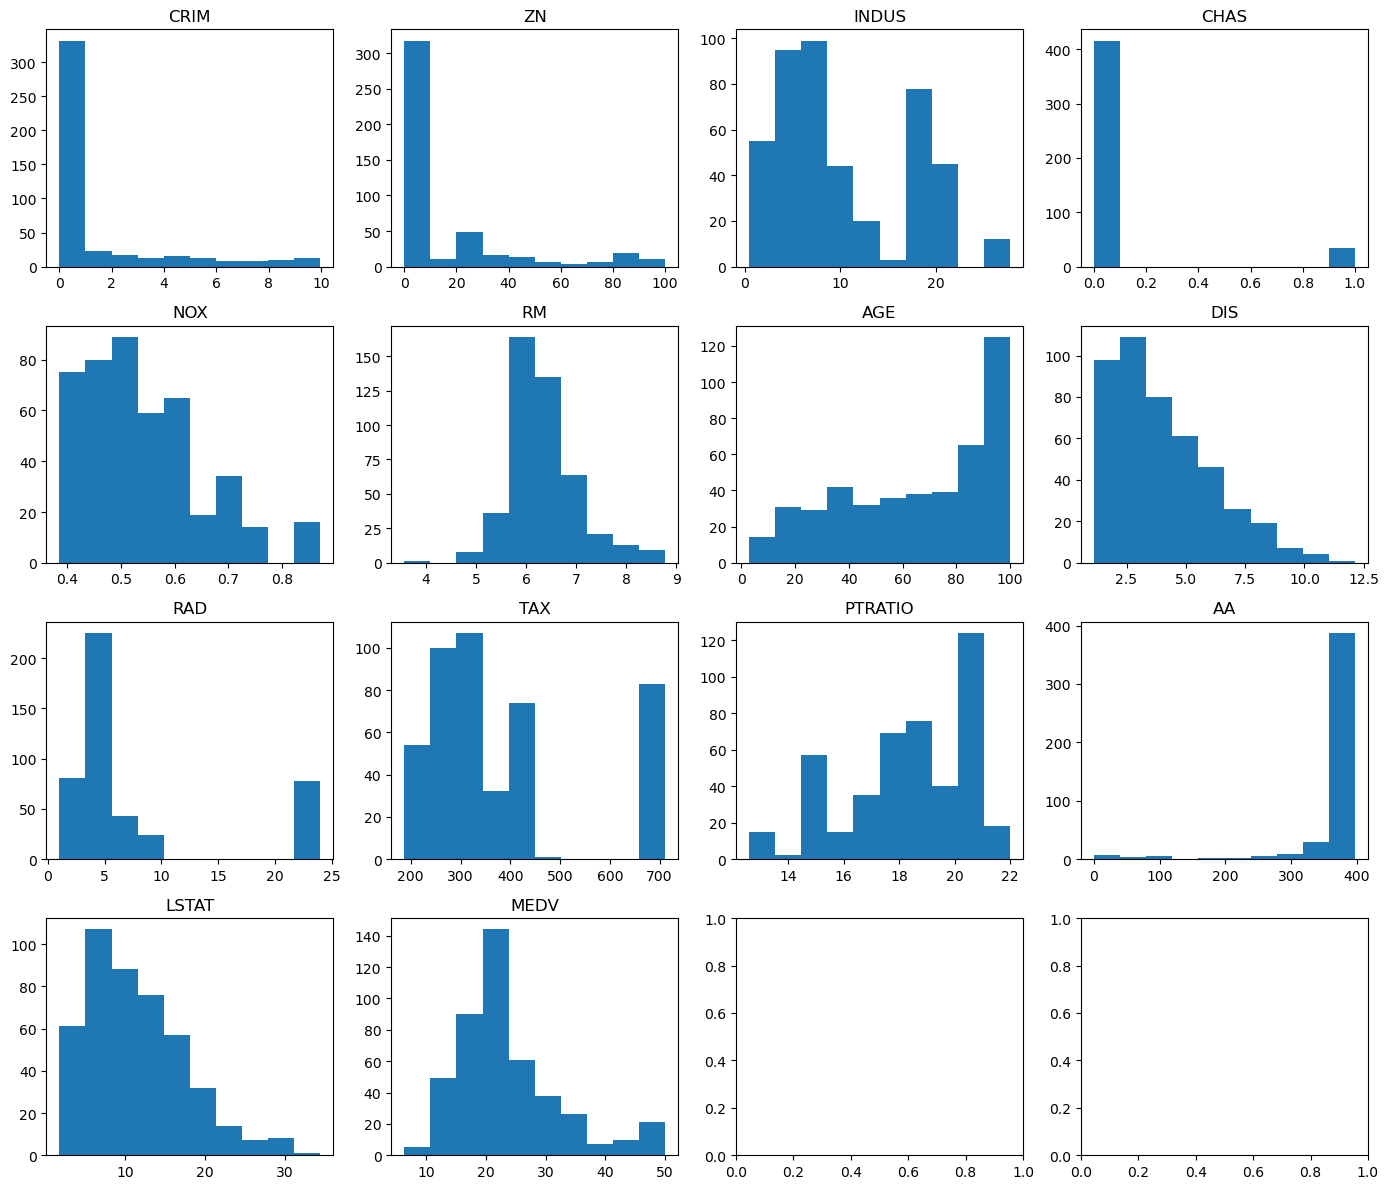

In [12]:
# Plot histogram for each variable. I encourage you to work with the histogram. 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12))
for i, col in enumerate(df.columns):
    axes[i // 4, i % 4].hist(df[col])
    axes[i // 4, i % 4].set_title(col)
plt.tight_layout()
plt.show()

## STEP 5B: Create Density Plots 
- Create density plots from the dataframe df that 14 numeric variables, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots 
- Plot the density plots

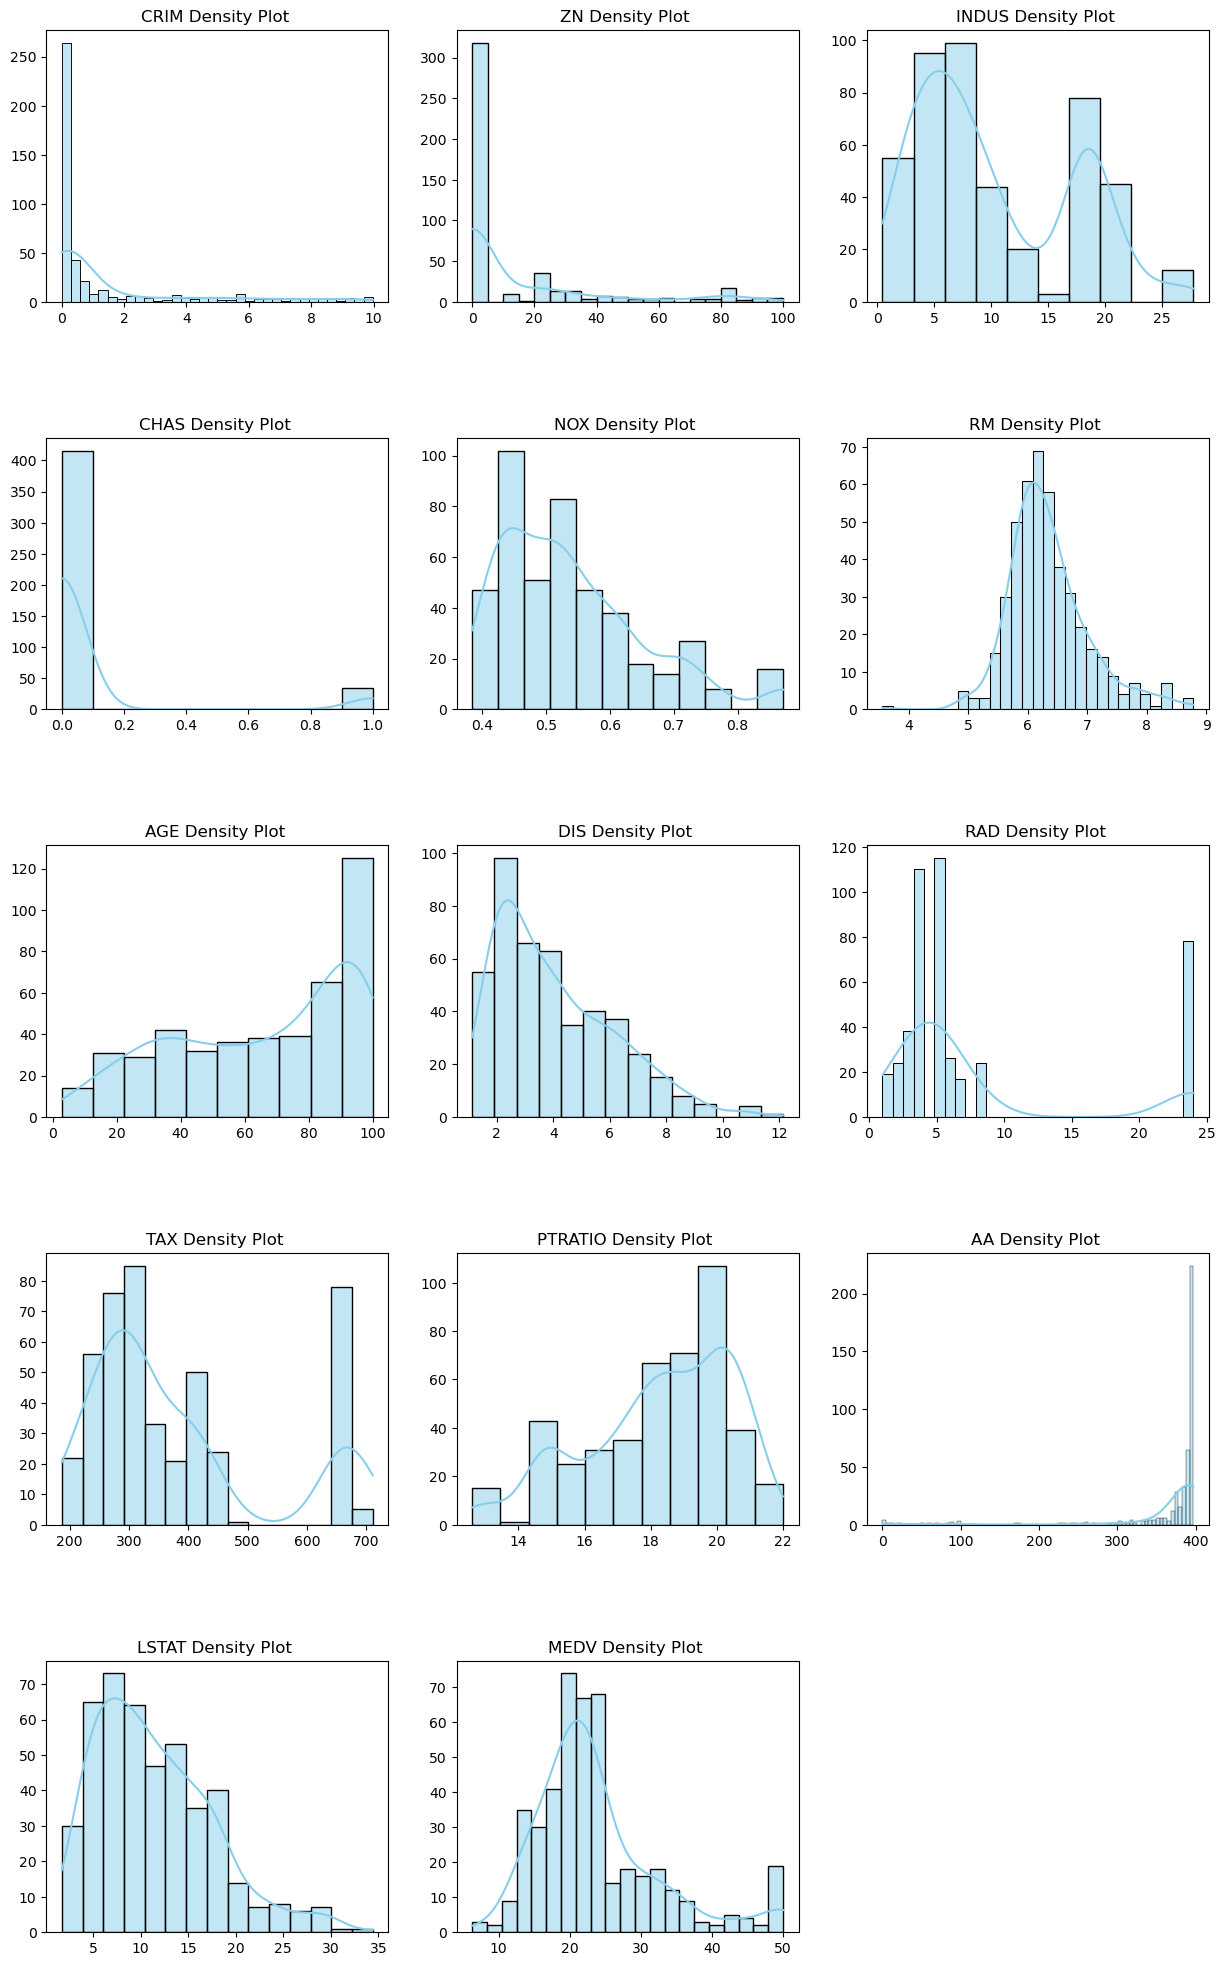

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for plotting
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Set the layout
num_plots = numeric_columns.shape[1]
num_rows = num_plots // 3
num_rows += num_plots % 3  # Add an extra row if there are leftover plots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Plot density plots
for i, (col, ax) in enumerate(zip(numeric_columns.columns, axes.flatten())):
    sns.histplot(data=df, x=col, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'{col} Density Plot ')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
# Remove empty subplots
for i in range(num_plots, num_rows*3):
    fig.delaxes(axes.flatten()[i])

    
# Display the plots
plt.show()


## STEP 5C: Create Boxplots 
- Create a boxplots from the dataframe df with a layout (5,3) and figure size (20,18). Ensure subplots is True and sharex is False.
- Plot the boxplots

<Figure size 2000x1800 with 0 Axes>

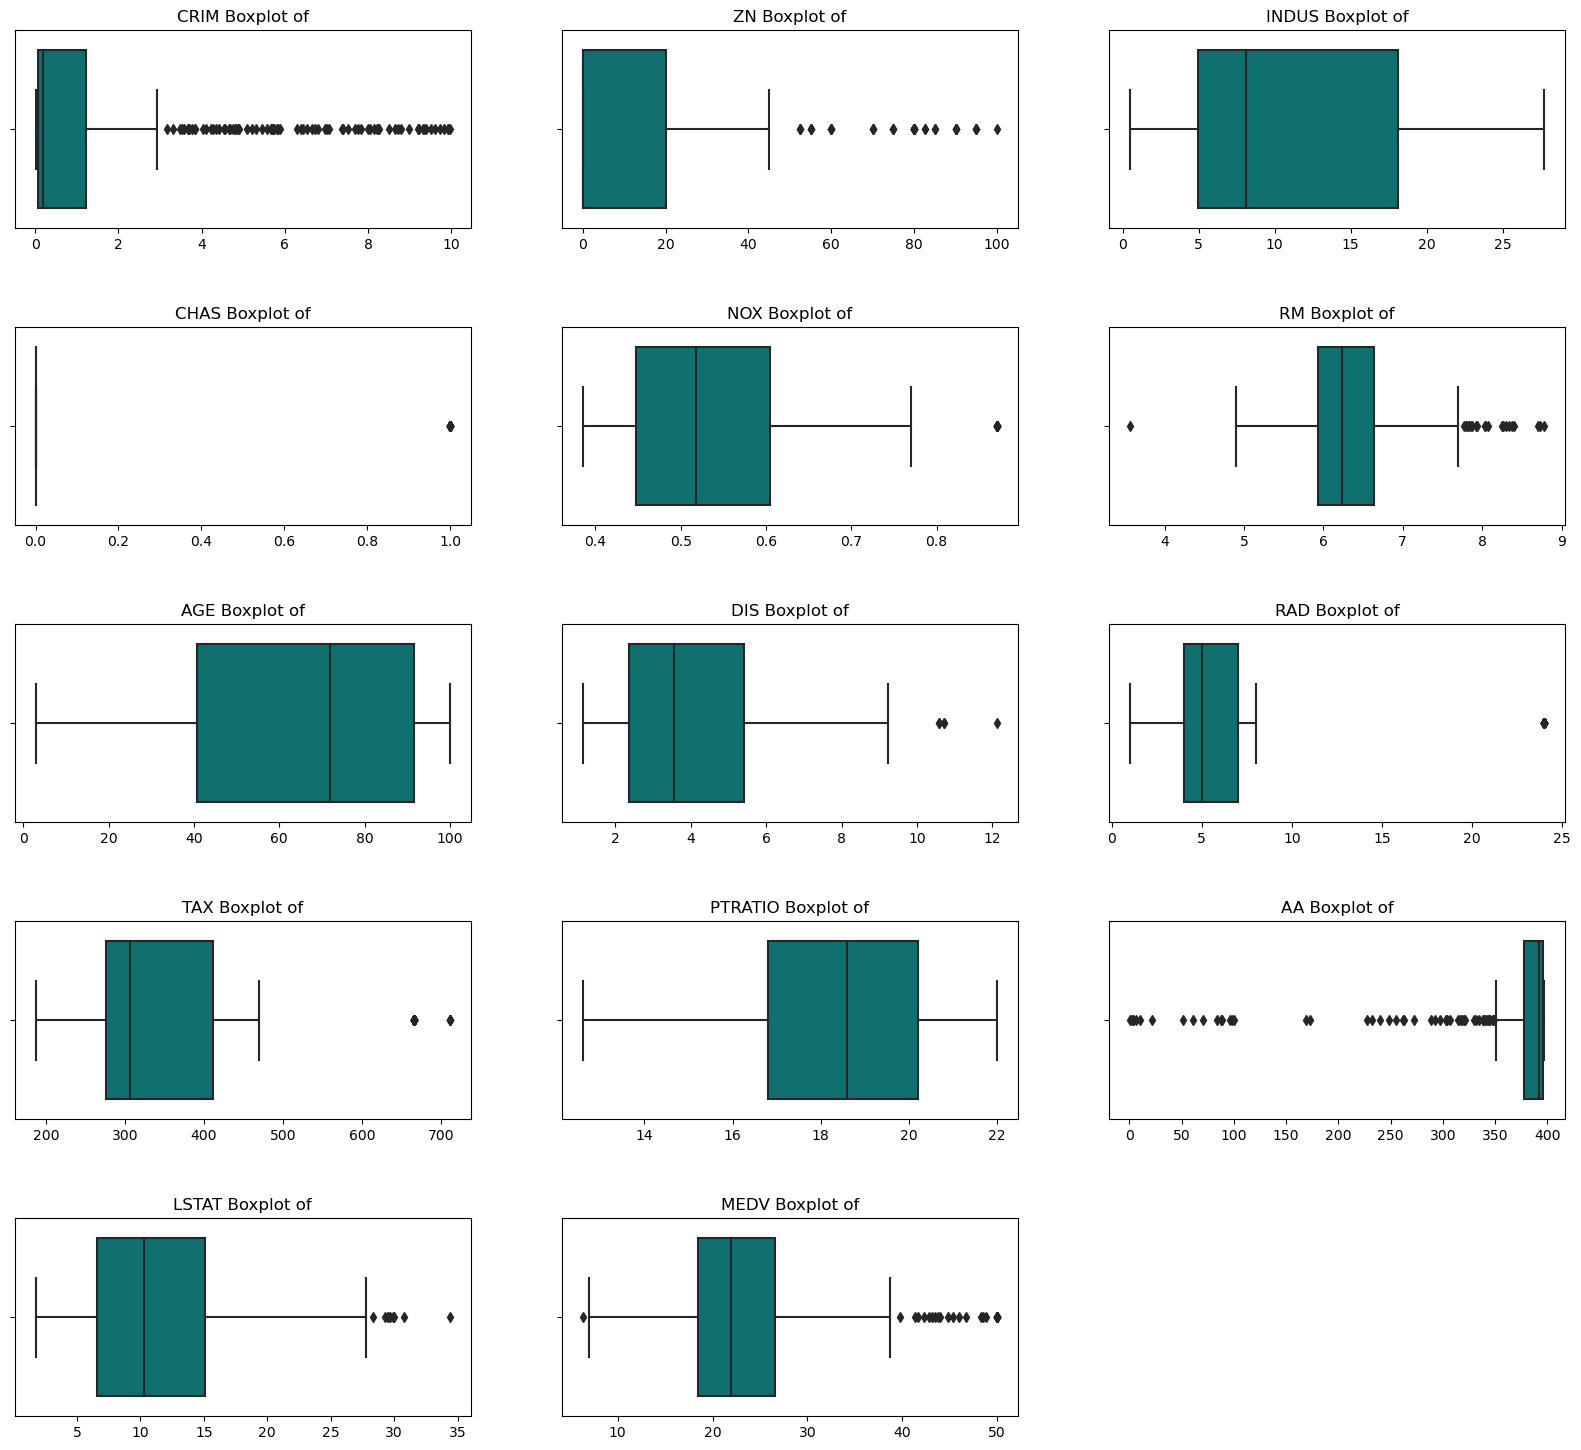

In [14]:
# Boxplots


# Set the figure size and layout
plt.figure(figsize=(20, 18))
fig, axes = plt.subplots(5, 3, figsize=(20, 18), sharex=False)
fig.subplots_adjust(hspace=0.5)

# Plot boxplots
for i, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    sns.boxplot(x=df[col], ax=ax, color='Teal')
    ax.set_title(f'{col} Boxplot of')
    ax.set_xlabel('')
    
# Remove empty subplots
for i in range(len(df.columns), 5 * 3):
    fig.delaxes(axes.flatten()[i])

# Display the plots
plt.show()


## STEP 5D: Pair Plots - Correlation Analysis and Feature Selection 
- Create pair plots of the dataframe with a height of 1.5
- Plot the pair plots
- Use the format function to decrease the number of decimal places to three
- Obtain the correlation of the dataframe

In [ ]:
# Create pair plots with a height of 1.5 and format numbers to three decimal places
sns.set(style="ticks")
sns.pairplot(df, height=1.5)
plt.suptitle('Pair Plots of the Dataset', y=1.02)  # Add a title with some space above the plots
plt.show()

In [ ]:
#Obtain pair plots of the data. I know this is a lot of information, but I wanted you to see what is possible with the Seaborn library.

sns.set(style="ticks")
pairplot = sns.pairplot(df, height=1.5)
plt.suptitle("Pair Plots of Variables", y=1.02, fontsize=16)


In [1]:
# We will decrease the number of decimal places with the format function.
#Add your co
for ax in pairplot.axes.flatten():
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.3f}".format(x)))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.3f}".format(x)))
plt.show()


NameError: name 'pairplot' is not defined

In [15]:
# Here we will get the correlations, with only 3 decimals.
correlation_matrix = df.corr()
print(correlation_matrix)



             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.281081  0.573427  0.049724  0.637138 -0.142090  0.447808   
ZN      -0.281081  1.000000 -0.514525 -0.059566 -0.500743  0.306513 -0.555702   
INDUS    0.573427 -0.514525  1.000000  0.102427  0.739591 -0.364597  0.606882   
CHAS     0.049724 -0.059566  0.102427  1.000000  0.134061  0.076820  0.123144   
NOX      0.637138 -0.500743  0.739591  0.134061  1.000000 -0.264611  0.707148   
RM      -0.142090  0.306513 -0.364597  0.076820 -0.264611  1.000000 -0.187886   
AGE      0.447808 -0.555702  0.606882  0.123144  0.707148 -0.187886  1.000000   
DIS     -0.462105  0.656176 -0.670335 -0.140661 -0.745812  0.138776 -0.720334   
RAD      0.897986 -0.266426  0.512195  0.056812  0.542944 -0.095333  0.359628   
TAX      0.825550 -0.269287  0.673157  0.016555  0.615289 -0.214630  0.427217   
PTRATIO  0.318532 -0.364222  0.314947 -0.100695  0.103597 -0.333842  0.193304   
AA      -0.412736  0.150223 

## STEP 5E: Creating Heatmaps 
- Create a heatmap of the dataframe with a figure size of 16x10, use the dataframe correlation and ensure annot is True
- Plot the heatmap
- For help type sns.heatmap?
- Create another dataframe df2 with less variables 
- Obtain the correlation of the dataframe df2
- Plot pair plot for df2 with a height of 5.5
- Create a heatmap of the dataframe df2 with a figure size of 20x12, use the dataframe correlation and ensure annot is True
- Change the color to blue and increase the font size 20

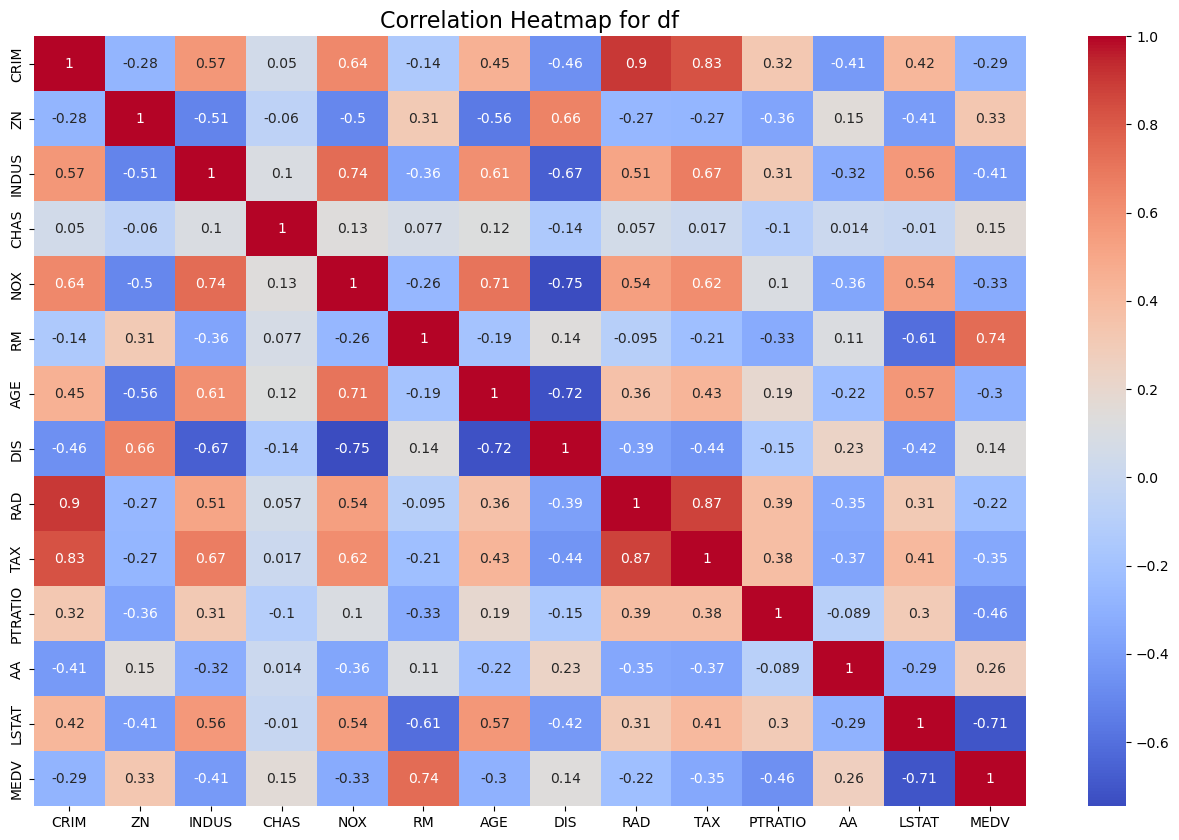

In [16]:
# We could simply look at the correlations, but a heatmap is a great way to present to the general audience.

# Create a heatmap for the original dataframe (df)
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for df', fontsize=16)
plt.show()

In [22]:
# If you get stuck on what can be done with the heatmap, you can use the following code to get help
df.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   

       AA  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7

In [43]:
# Now, let's say we want to decrease the number of variables in our heatmap.
# We would use the following code.
# Remember how to make a subset. Try using different variables.
# Subset the original DataFrame
df2 = df[['CRIM', 'TAX', 'INDUS','RAD', 'NOX', 'RM', 'LSTAT']]

# Calculate the correlation matrix for the subset
correlation_matrix_df2 = df2.corr()


In [44]:
# Here we will look at the correlations for only the variables in df2.
print(correlation_matrix_df2)

           CRIM       TAX     INDUS       RAD       NOX        RM     LSTAT
CRIM   1.000000  0.825550  0.573427  0.897986  0.637138 -0.142090  0.424137
TAX    0.825550  1.000000  0.673157  0.872869  0.615289 -0.214630  0.410306
INDUS  0.573427  0.673157  1.000000  0.512195  0.739591 -0.364597  0.564217
RAD    0.897986  0.872869  0.512195  1.000000  0.542944 -0.095333  0.308336
NOX    0.637138  0.615289  0.739591  0.542944  1.000000 -0.264611  0.537425
RM    -0.142090 -0.214630 -0.364597 -0.095333 -0.264611  1.000000 -0.607304
LSTAT  0.424137  0.410306  0.564217  0.308336  0.537425 -0.607304  1.000000


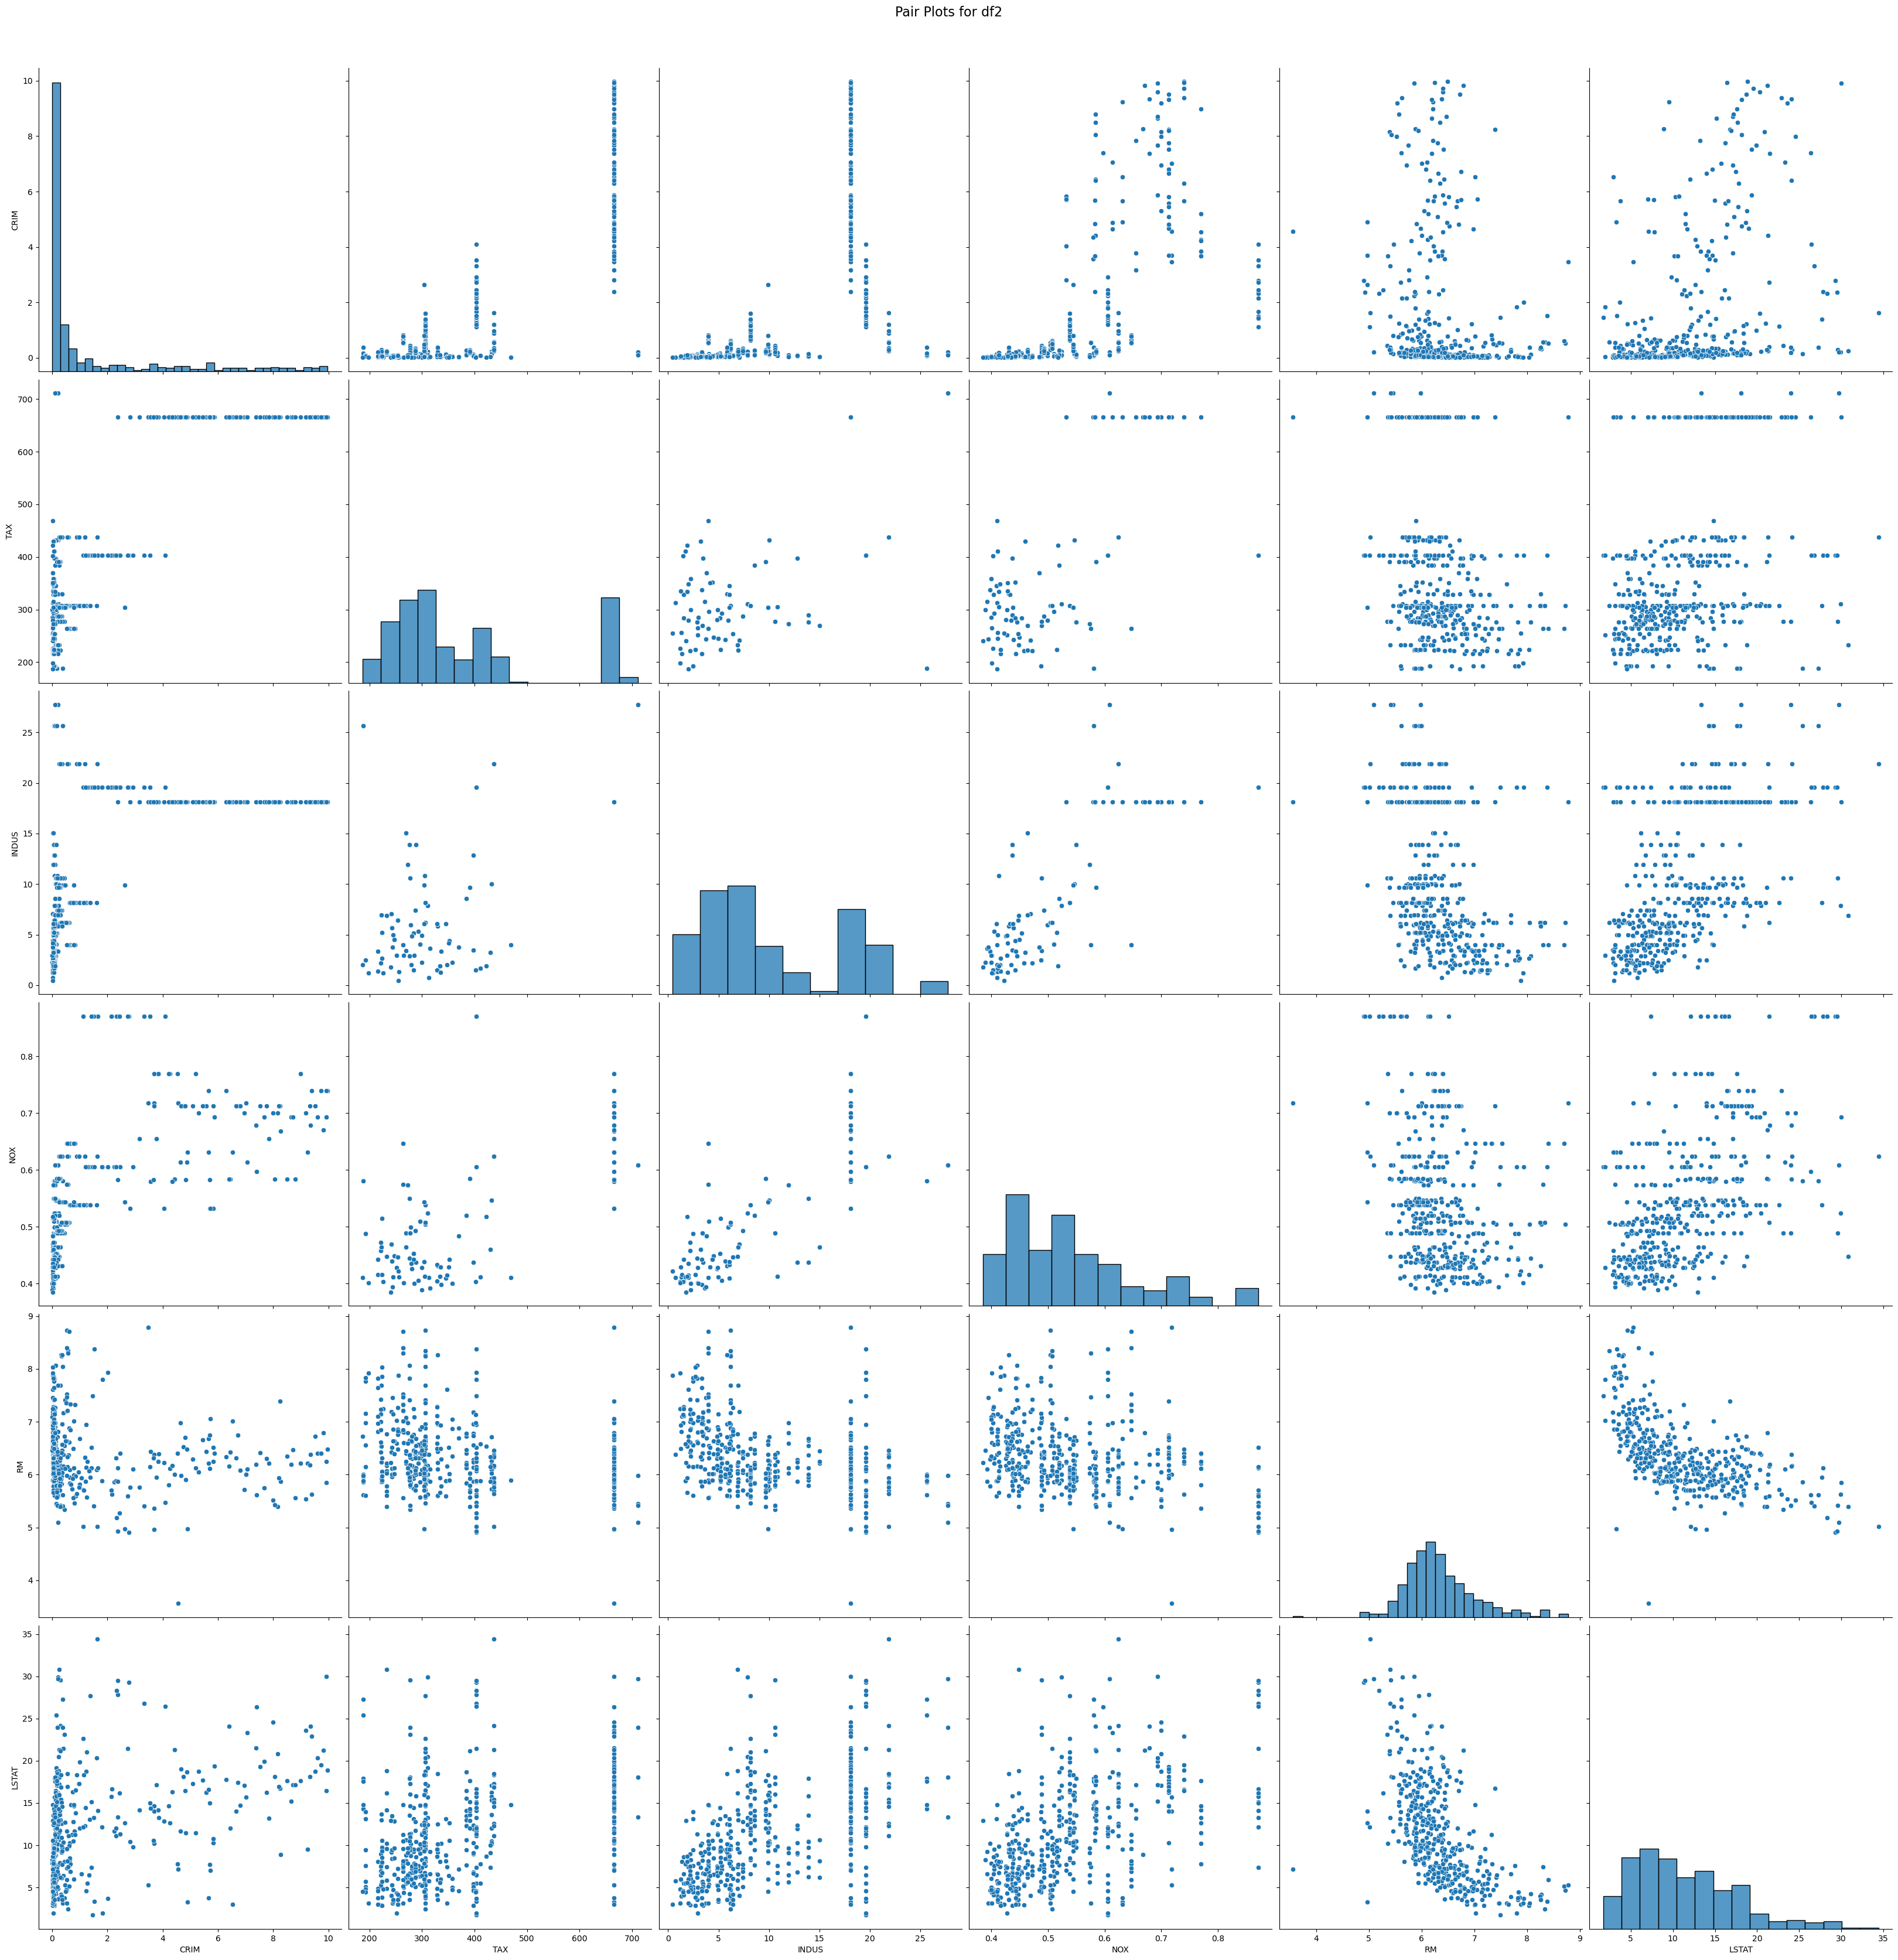

In [36]:
# Let's try the pairplot with only the variables in df2
sns.pairplot(df2, height=5.5)
plt.suptitle('Pair Plots for df2', y=1.02, fontsize=16)
plt.show()


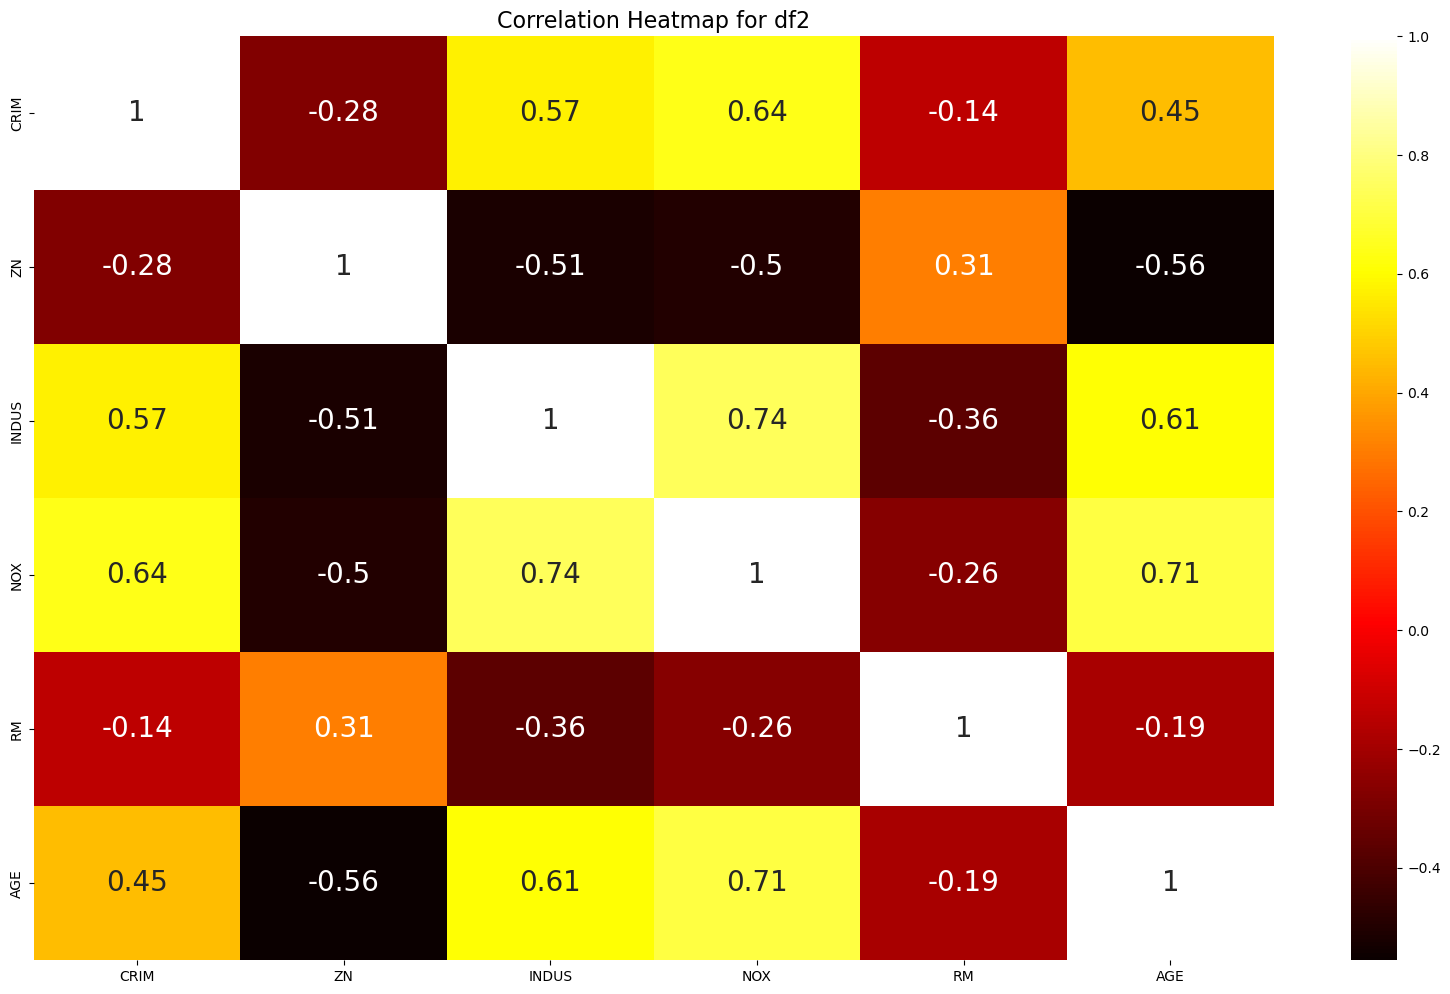

In [26]:
# Now, we will make a heatmap with only the variables in the df2 subset.
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_df2, annot=True, cmap='hot', annot_kws={"size": 20})
plt.title('Correlation Heatmap for df2', fontsize=16)
plt.show()

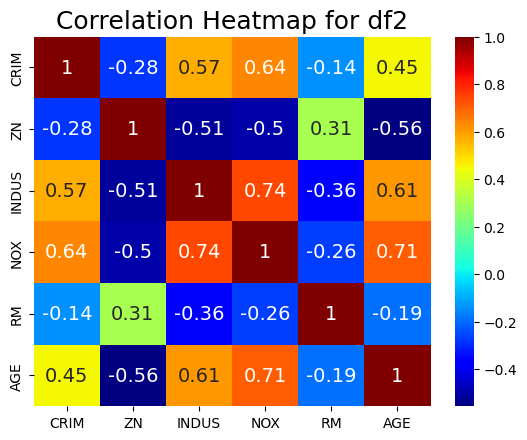

In [27]:
#If you want to change the color and font to make the labels easier to read, use this code.
sns.heatmap(correlation_matrix_df2, annot=True, cmap='jet', annot_kws={"size": 14})
plt.title('Correlation Heatmap for df2', fontsize=18)
plt.show()

## <font color=grey> WORKFLOW: DATA SPLIT </font>

## STEP 6: Separate the Dataset into Input & Output NumPy Arrays 
- Store the dataframe d2 values into a NumPy array
- Separate the array into input and output components by slicing 

In [45]:
# Store the dataframe values into a NumPy array
array= df2.values
# Separate the array into input and output components by slicing
# For X (input) [:,3] --> All the rows and columns from 0 up to 3
X = array [:, 0:3]
# For Y (output) [:3] --> All the rows in the last column (MEDV)
Y = array [:,3]

## STEP 7: Split into Input/Output Array into Training/Testing Datasets 
- Split the dataset into training at 67% and test at 33% with the seed = 7


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (302, 3)
X_test shape: (149, 3)
Y_train shape: (302,)
Y_test shape: (149,)


## <font color=grey> WORKFLOW: TRAIN MODEL </font>

## STEP 8: Build and Train the Model 
- Assign LinearRegression to the model
- Train the model 
- Print the intercept and coefficients
- Print the list of the coefficients with their correspondent variable name


In [47]:
#Add your codes here
from sklearn.linear_model import LinearRegression

# Build the model
model = LinearRegression()

# Train the model using the training sub-dataset
model.fit(X_train, Y_train)



LinearRegression()

In [48]:
#Add your codes here
from sklearn.linear_model import LinearRegression

# Build the model
model = LinearRegression()

# Train the model using the training sub-dataset
model.fit(X_train, Y_train)



LinearRegression()

In [49]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

## <font color=grey> WORKFLOW: SCORE MODEL </font>

## STEP 9: Calculate R-Squared 
- Calculate the R-Squared 
- Print the score

** Note: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable, which is very low. Think about how you could increase the R-squared. What variables would you use? 

In [50]:
# Calculate R-squared on the test data
r_squared = model.score(X_test, Y_test)

# Print R-squared
print("R-squared:", r_squared)


R-squared: 0.8795028914290328


## Step 10: Prediction 
- Execute model prediction
- We have now trained the model. Let's use the trained model to predict the "Median value of owner-occupied homes in 1000 dollars" (MEDV). 
- We are using the following predictors: 


- CRIM: per capita crime rate by town: 12
- INDUS: proportion of non-retail business acres per town: 10
- TAX: full-value property-tax rate per $10,000: 450

** Note: The model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $24,144. 

In [102]:
#Add your code here# Execute model prediction
predictors = np.array([12, 10, 450])

# Make a prediction
prediction = model.predict([predictors])

# Print the prediction
print("Prediction:", prediction)

ValueError: X has 3 features, but LogisticRegression is expecting 4 features as input.

## <font color=grey> WORKFLOW: EVALUATE MODELS </font>

## Step 11: Train & Score Model 2 Using K-Fold Cross Validation Data Split
- Specify the k-size to 10
- Fix the random seed to 7
- Split the entire data set
- Obtain the Mean squared error
- Train the model and run K-fold cross-validation
- Print results

In [ ]:

#Add your codes here

#Add Your Code Here# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds


# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm



In [ ]:
#Add your codes here

# Train the model and run K-foLd cross-validation to validate/evaluate the model


# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold crossvalidation



Note: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us. We see a -64 avg of all errors (mean of square errors). This value would traditionally be positive, but scikit reports this value as a negative value. If the square root had been evaluated, the value would have been around 8.

## Step 12: Score Using Explained Variance
Let's use a different scoring parameter. Here we use the Explained Variance. The best possible score is 1.0; lower values are worse.
- Specify the k-size to 10
- Set the seed to 7
- Split the entire data set
- Obtain the explained variance score
- Train the model and run K-fold cross-validation
- Print results

In [28]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score

# Evaluate the algorithm
# Specify the K-size
# Split the data into features and target
df = pd.read_csv('housing_boston.csv', header=None)


X = df.drop('MEDV', axis=1)
y = df['MEDV']

num_folds = 10

k = 10

# Fix the random seed must use the same seed value so that the same subsets can be obtained

np.random.seed(7)

# for each time the process is repeated
#seed = 7
# Split the whole data set into folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

explained_variance_scores = []
# For Linear regression, we can use explained variance value to evaluate the model/algorithm


KeyError: "['MEDV'] not found in axis"

In [101]:
#Add your codes here

# Train the model and run K-foLd cross-validation to validate/evaluate the model
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
     knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    explained_variance_score = explained_variance_score(y_test, y_pred)
    explained_variance_scores.append(explained_variance_score)


# Print out the evaluation results
print('Mean explained variance score:', np.mean(explained_variance_scores))
print('Standard deviation of explained variance score:', np.std(explained_variance_scores))

# Result: the average of all the results obtained from the k-fold crossvalidation



IndentationError: unexpected indent (732749937.py, line 8)

To learn more about Scikit Learning scoring [https://scikitlearn.org/stable/modules/model_evaluation.html (Links to an external site.)]

<hr style="border:5px solid green"> </hr>

# <center><font color=green>Part 2: Logistic Regression</font> </center> 

## Machine Learning Supervised Logistic Regression
• Let's begin Part 2 using logistic regression using the same Supervised Learning Workflow used in part 1.

## STEP 1: Import Libraries 
- import pandas and numpy libraries
- import scatter_matrix from pandas.plotting
- import matplotlib
- import seaborn
- import LogisticRegression from sklearn.linear_model
- import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
- import classification_report from sklearn.metrics 

In [96]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [97]:
#Add Your Code Here# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [99]:
# Import scikit-Learn module to split the dataset into train/ test subdatasets
from sklearn.model_selection import train_test_split

In [100]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
# Import scikit-Learn module classification report to later use for information about how the system
from sklearn.metrics import classification_report

## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
- Read the description of the dataset listed below
- Dataset is provided in the module and assignment. It is called iris.csv.
- Load the data into Pandas dataframe called df
- View the first five rows of the dataframe

## Description Iris Dataset 
Data Set: iris.csv 

Title: Iris Plants Database Updated Sept 21 by C. Blake -Added discrepancy information Sources:

- Creator: RA_ Fisher
- Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
- Date: 1988

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Predicted attribute: class of Iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric

Predictive attributes and the class attribute information:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

class:   

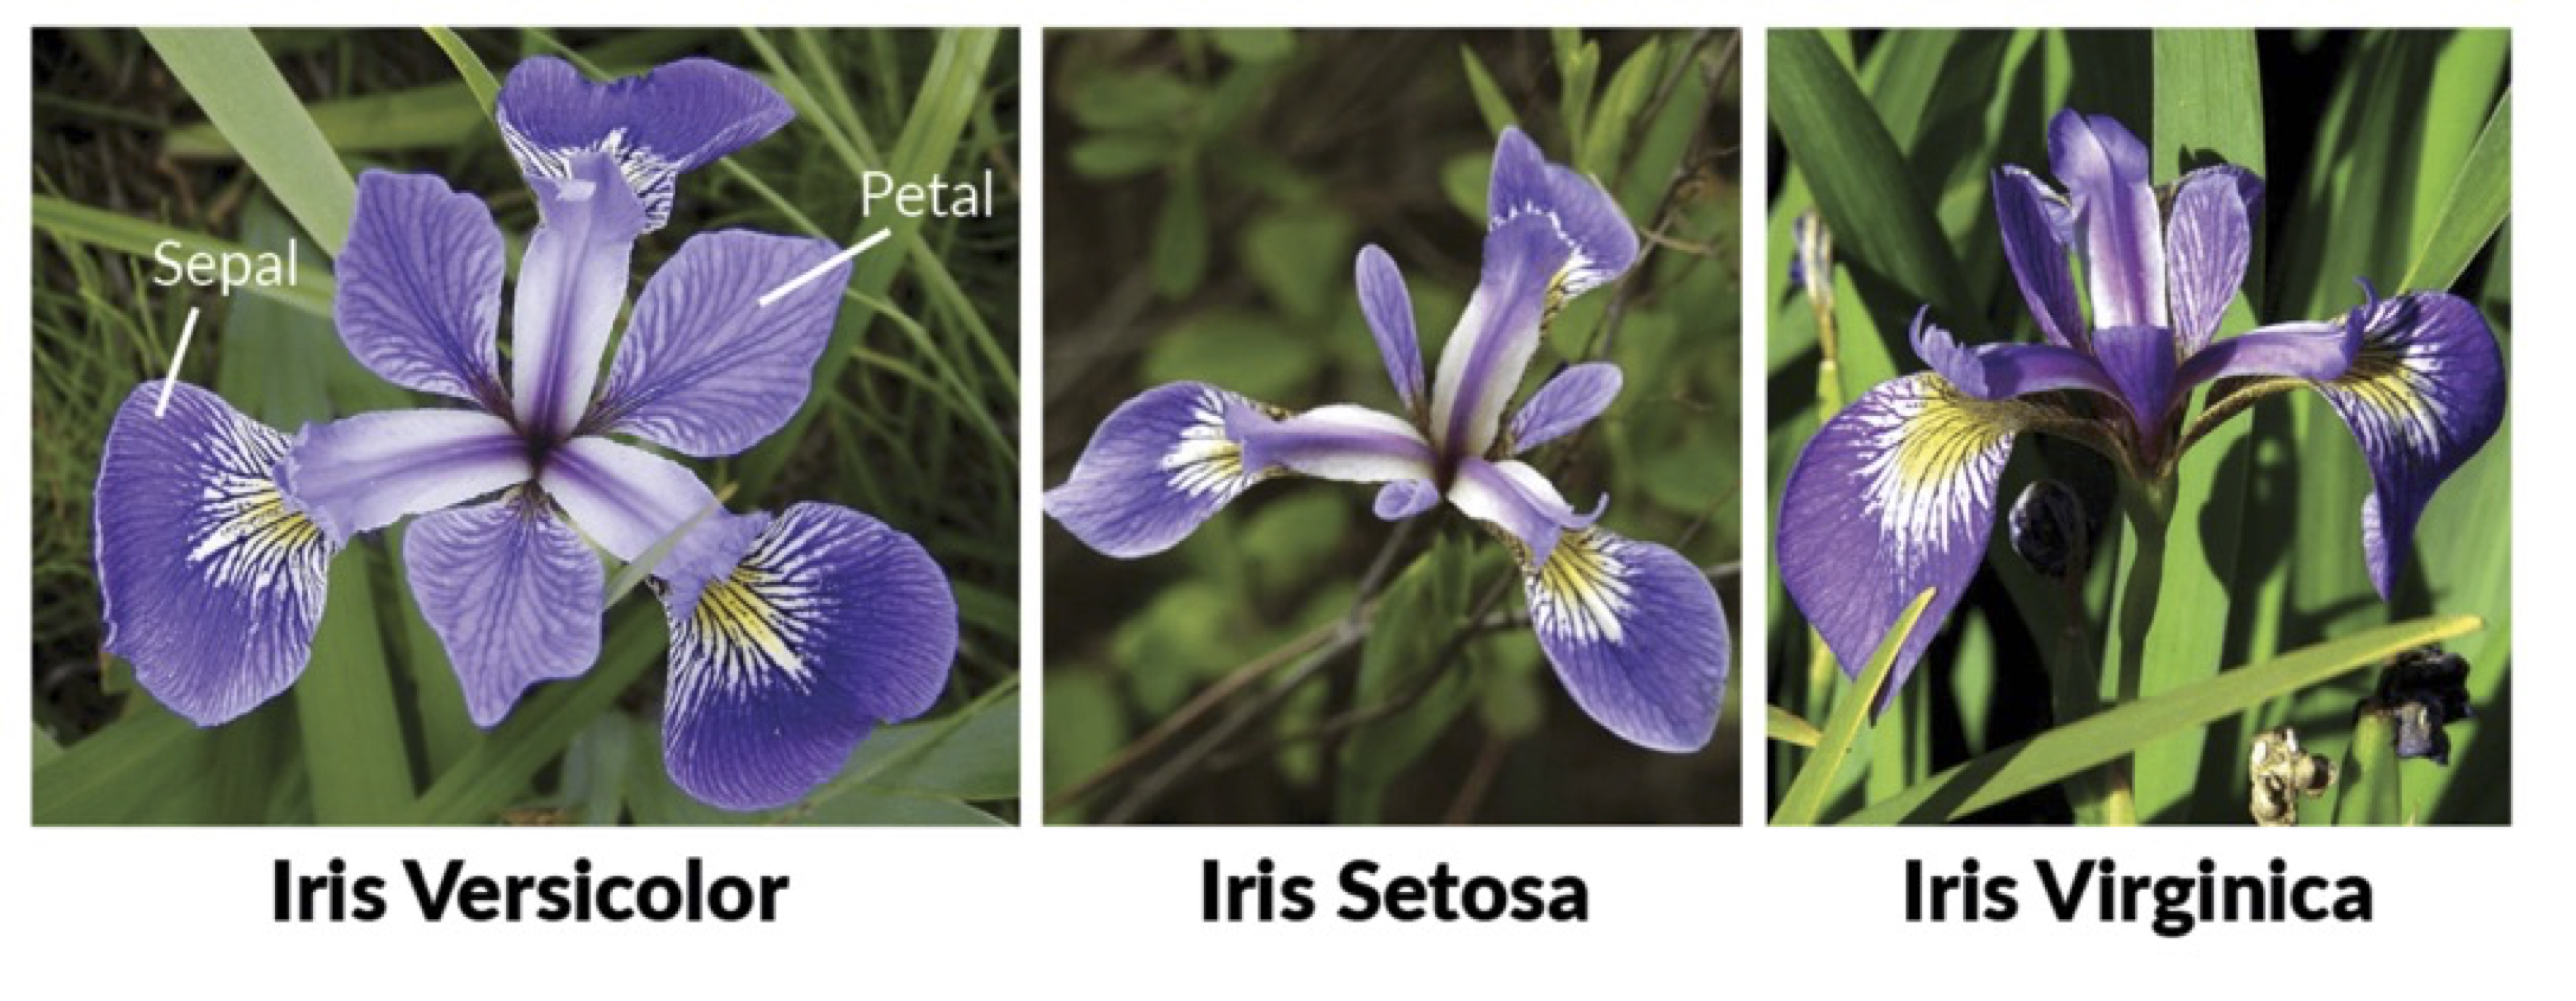

In [51]:
# Specify the location of the dataset
filename = 'iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

In [53]:
# Look at the data frame
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset  </font>

## STEP 3: Clean the data
- Find and Mark Missing Values 
- If there are no missing data points, then proceed to Step 4.


In [54]:
#Add your codes here
df.replace(0, pd.NA, inplace=True)

# mark zero values as missing or NaN
nan_counts = df.isna().sum()


# count the number of NaN values in each column
print("Number of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## STEP 4: Performing the Exploratory Data Analysis (EDA) 
- Print a count of the number of rows (observations) and columns (variables)
- Print the data types of all variables
- Print a summary statistics of the data
- Print the number of records in each class

In [55]:
#Add your codes here

# Get the number of records/rows and the number of variables/columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 150
Number of columns: 6


In [56]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [57]:
#return the summary statistics of the numeric variables/attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [95]:
#Add your codes here

#class distribution i.e. how many records are in each class


## STEP 4A: Create Histograms 
- Create histograms from the dataframe df that is black with a figure size of 14 x 12
- Plot the histograms


<Figure size 1400x1200 with 0 Axes>

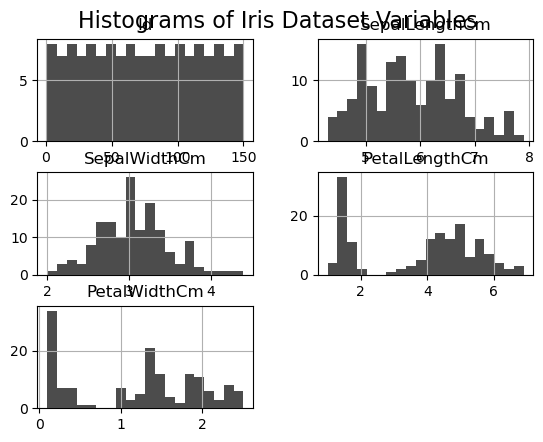

In [60]:
#Add your codes here

# Plot histogram for each variable.

plt.figure(figsize=(14, 12))
df.hist(color='black', bins=20, alpha=0.7)
plt.suptitle("Histograms of Iris Dataset Variables", y=0.94, fontsize=16)
plt.show()

## Step 4B: Creating Boxplots 
- Create boxplots from the dataframe df with a layout (5,3) and figure size (20,18). Ensure subplots is True and sharex is False.
- Plot the boxplots


In [94]:
#Add your codes here

# Boxplots



## Step 4C: Create Pair Plots 
- Create pair plots of the dataframe with a height of 3.5
- Plot the pair plots
- Add color

Note: Please click on the above URL to learn more about Pair Plots 

https://seaborn.pydata.org/generated/seaborn.pairplot.html


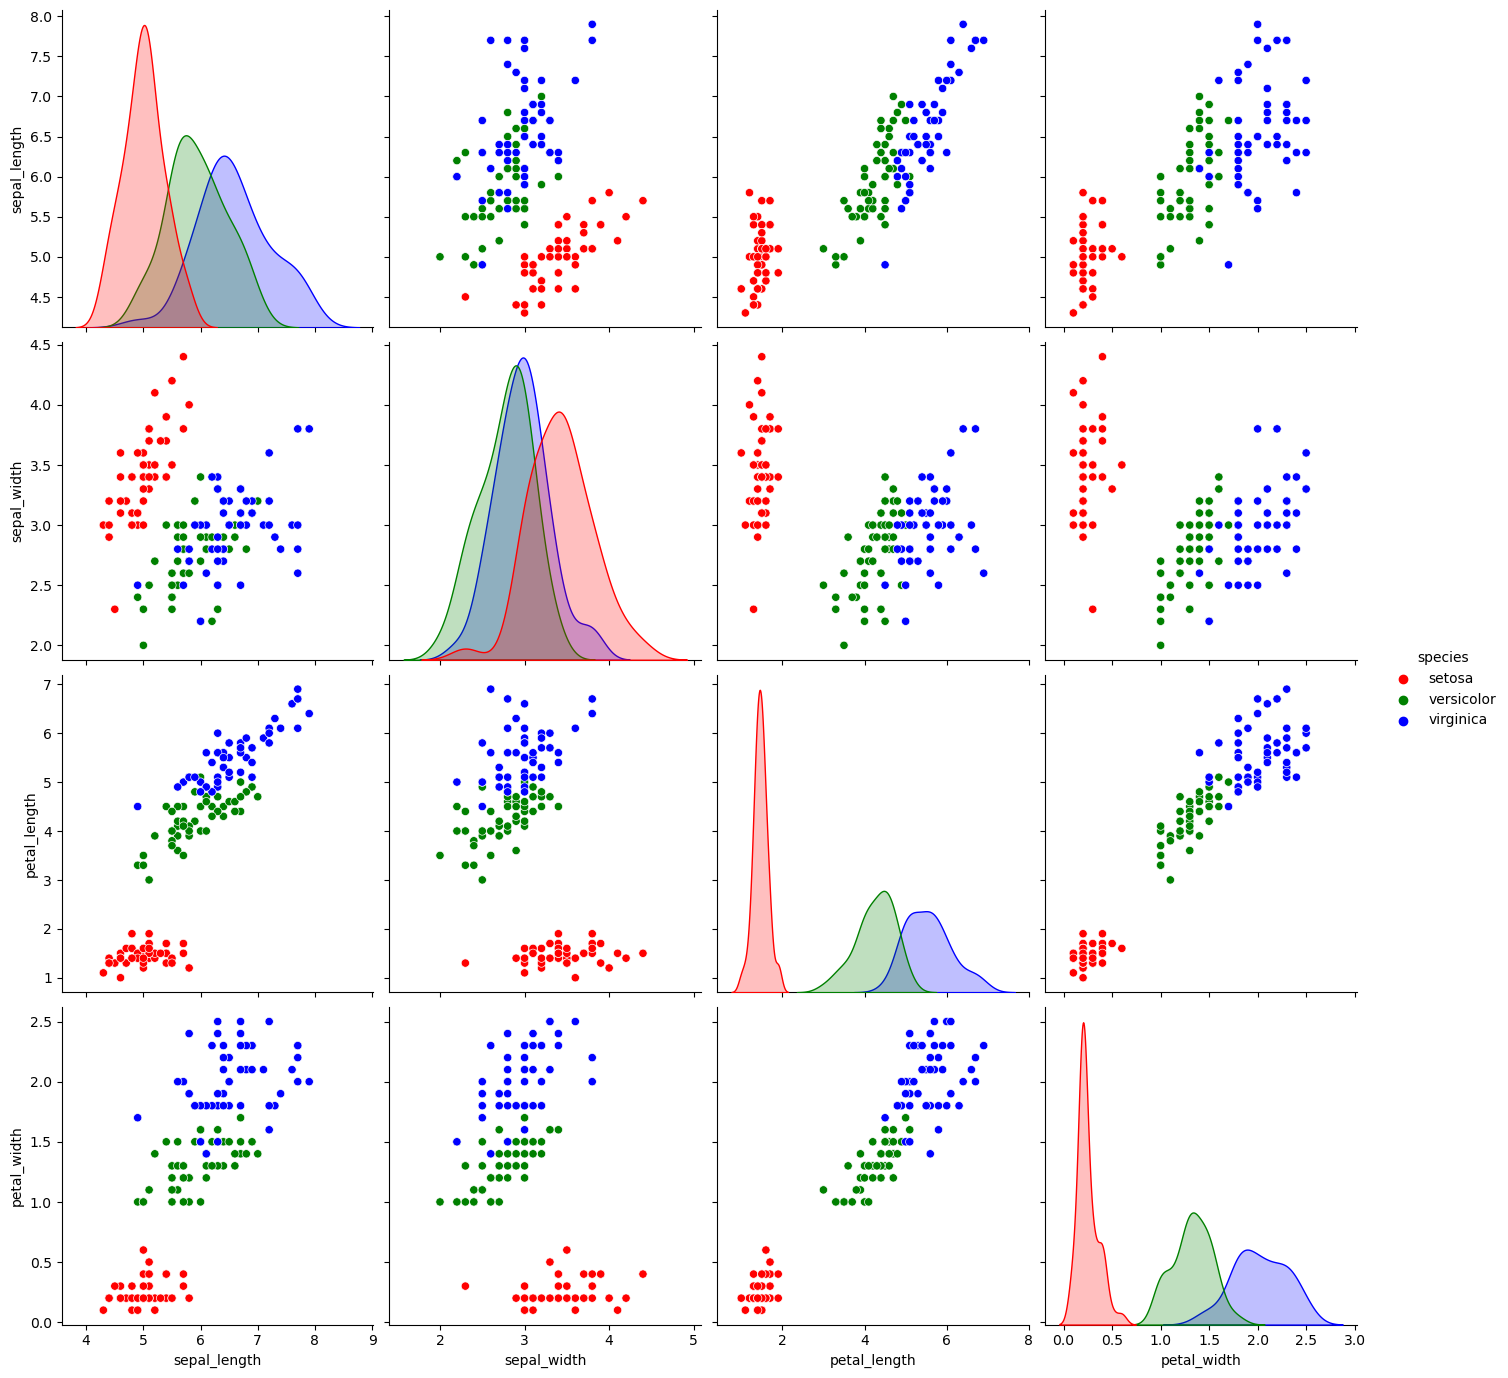

In [71]:
#Add your codes here

# Load the Iris dataset
df = sns.load_dataset("iris")
# Create pair plots
sns.pairplot(
    df,
    height=3.5,
    hue="species",
    palette=["red", "green", "blue"],
)

# Show the plot
plt.show()


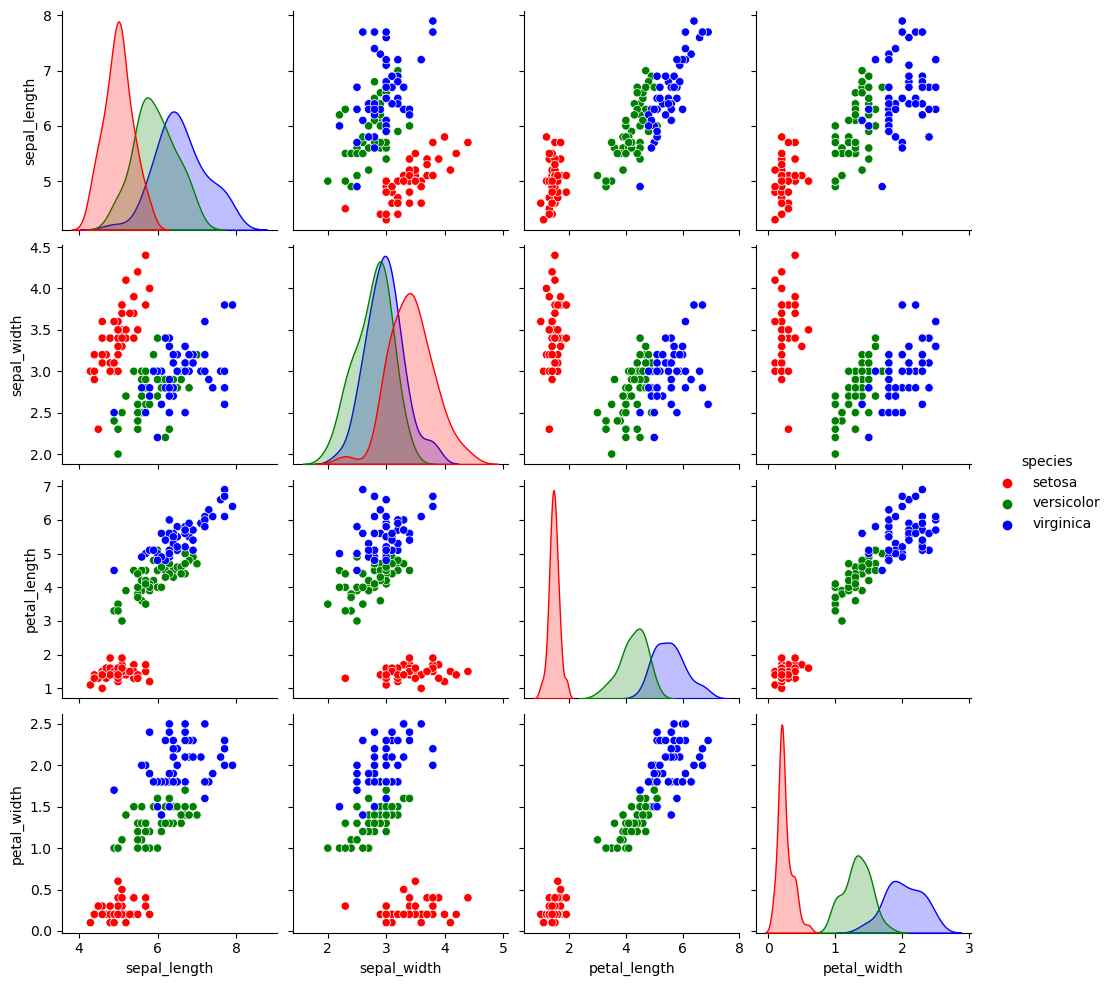

In [72]:
#Add your codes here

# Let's try that again using color. Notice: assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)

# Create a pairplot with the points colored by the species column
sns.pairplot(df, hue="species", palette=["red", "green", "blue"])

# Show the plot
plt.show()

## Step 4D: Creating Violin Plots 
- Create violin plots 
- Plot the violin plots
- Add color

Note: Please click on the above URL to learn more about Violin Plots 

https://seaborn.pydata.org/generated/seaborn.violinplot.html 


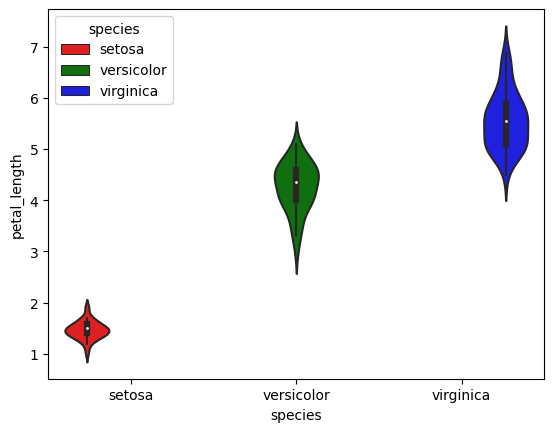

In [73]:
#Add your codes here
# Violin Plot
# Create violin plots with color
sns.violinplot(
    x="species",
    y="petal_length",
    hue="species",
    data=df,
    palette=["red", "green", "blue"],
)

# Show the plot
plt.show()






## <font color=grey> WORKFLOW: DATA SPLIT  </font>

## STEP 5: Separate the Dataset into Input & Output NumPy Arrays 
- Store the dataframe values into a NumPy array
- Separate the array into input and output components by slicing 

In [77]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5
# these are the independent variables or predictors
X = array[:,:-1]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,4]

## STEP 6: Split into Input/Output Array into Training/Testing Datasets 
- Split the dataset into training at 67% and test at 33% with the seed = 7


In [78]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
from sklearn.model_selection import train_test_split

test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7

In [79]:
#Add your codes here
#split the dataset (input and output) into training / test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


## <font color=grey> WORKFLOW: TRAIN MODEL  </font>

## STEP 7: Build and Train the Model 
- Assign LogisticRegression to the model
- Train the model 
- Print the classification report

In [81]:
#Add your codes here

#build the model
model = LogisticRegression()

# train the model using the training sub-dataset
model.fit(X_train, y_train)



LogisticRegression()

In [83]:
#Add your codes here
#print the classification report
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



## <font color=grey> WORKFLOW: SCORE MODEL 1  </font>

## STEP 8: Score the Accuracy of the Model 
- Calculate accuracy score 
- Print the score

In [85]:
#Add your codes here
#score the accuracy level

#print out the results
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the score
print(accuracy)

0.92


## Step 9: Prediction 
- Execute model prediction

Note: We have now trained the model and using that trained model to predict the type of flower we have with the listed values for each variable. 

In [86]:
#Add your codes here

#predict with[5.3, 3.0, 4.5, 1.5]

# Predict the type of flower with the listed values
prediction = model.predict([[5.3, 3.0, 4.5, 1.5]])

# Print the prediction
print(prediction)

['versicolor']


In [87]:
#Add your codes here
#predict with [5, 3.6, 1.4, 1.5]
prediction = model.predict([[5,3.6,1.4,1.5]])

#print the prediction 
print (prediction)



['setosa']


## <font color=grey> WORKFLOW: EVALUATE MODELS  </font>

## Step 10: Train & Score Model 2 Using K-Fold Cross Validation Data Split
- Specify the k-size to 10
- Fix the random seed to 7
- Split the entire data set
- Obtain the accuracy level
- Train the model and run K-fold cross-validation
- Print results


In [90]:
#Add your codes here
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Evaluate the algorithm and specify the number of times of repeated splitting, in this case, 10 folds
n_splits=10
#Fix the random seed. You must use the same seed value so that the same subsets can be obtained for each time the process is repeated
seed=7

# for logistic regression, we can use the accuracy level to evaluate the model



In [91]:
#Add your codes here
kf = KFold(n_splits=n_splits, shuffle=True)
model = LogisticRegression()

#train the model and run K-fold cross-validation to validate / evaluate the model
scores = []
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    score = accuracy_score(y_test, y_pred)

    # Add the score to the list of scores
    scores.append(score)

# Calculate the average accuracy score
average_score = sum(scores) / len(scores)



# print the evaluation results. The result is the average of all the results obtained from the K-fold cross-validation


print(f"Average accuracy score: {average_score:.2f}")

C:\Users\user\.anaconda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\.anaconda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Average accuracy score: 0.97


## GREAT JOB! YOU ARE DONE.